In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.stats import lognorm


In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))
from episiming.compartimentais import F
import episiming

## Testes com a função kappa
Nesse notebook, faremos testes colocando a função kappa como uma lognormal de parâmetros $\delta$ e $\eta$. Além disso, fazemos testes mudando o vetor de infectados iniciais, para começar com indivíduos já infectados há mais de um dia. Os valores desse vetor são dados pela distribuição Weibull.

In [3]:
# função da distribuição weibull que usamos pra nos dar o infectados_contador
# a = 1 shape, k
# lamb = -2 scale
def w(x, a = 1, lamb = -2):
    return np.floor((a/lamb) * (x/lamb) ** (a-1) * np.exp((-x/lamb) ** a))

In [4]:
# testes com funções kappa que não são a lognormal
def kappa_p(t, periodo_incubacao = -1, periodo_infeccao = 5):
    b = (t < periodo_incubacao + periodo_infeccao)
    c = (t > periodo_incubacao)
    return np.logical_and(b,c).astype(int)

In [5]:
# np.log(np.log(2)/0.3846153846153846), np.sqrt(-2*np.log(np.log(2)))

### Testes com delta e eta diferentes, sendo kappa a lognormal

In [6]:
# loc = 0.2
# fator = 3.5
# delta = [-0.7, -0.72, -0.74, -0.76, 0.588998524445772]
# eta = [1.6, 1.8, 2, 2.2, 0.8561692830061872]
beta = 0.6
gamma = 1/2.6
loc = 0.2
fator = 3.5
delta =  3*[np.log(np.log(2)/gamma)]
eta = [np.sqrt(-2*np.log(np.log(2))), 0.65, 1.05]
kappa0 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[0]), scale=eta[0], loc=loc)
kappa1 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[1]), scale=eta[1], loc=loc)
kappa2 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[2]), scale=eta[2], loc=loc)
# kappa3 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[3]), scale=eta[3], loc=loc)
# kappa4 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta[4]), scale=eta[4], loc=loc)
# kappas = [ kappa0, kappa1, kappa2, kappa3, kappa4]
kappas = [kappa0, kappa1, kappa2]

In [7]:
t_0 = 0
dt = 1
num_dt = 60
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 20

In [8]:
# beta = 0.5
# gamma = 0.1
# redes_completas = [episiming.cenarios.RedeCompleta(300, 20, 0.5, 0.1, kappa = kappa) for kappa in kappas]
redes_completas = [episiming.cenarios.RedeCompleta(300, 20, 0.6, 1/2.6, kappa = kappa) for kappa in kappas]

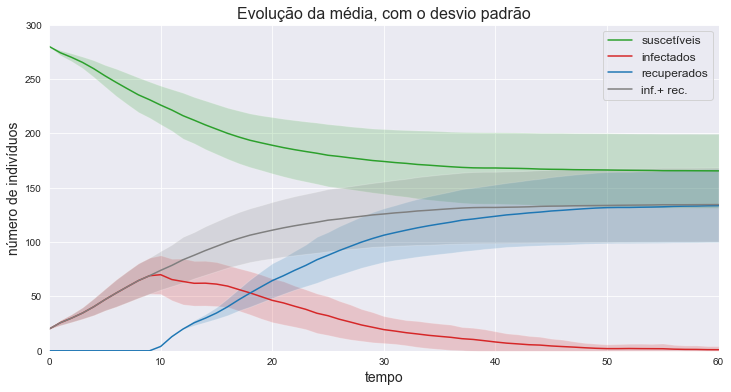

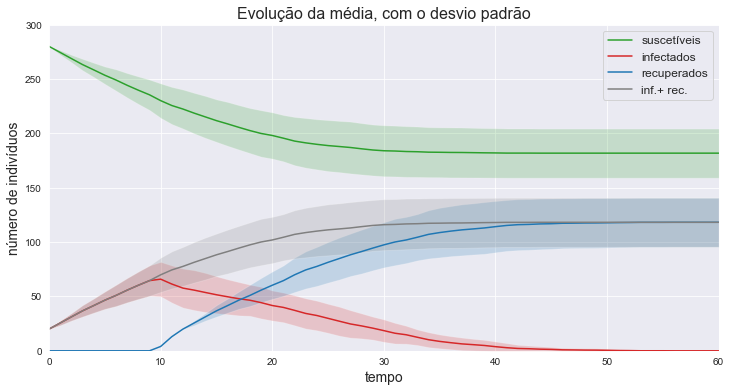

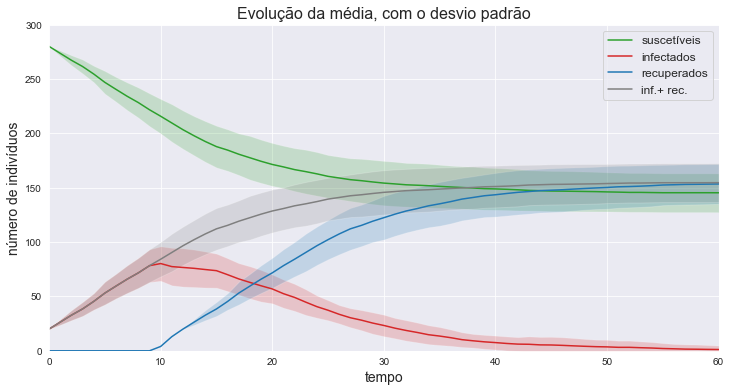

In [9]:
X_comps = [rede.evolui_matricial(dados_temporais, num_sim, show='sd') for rede in redes_completas]

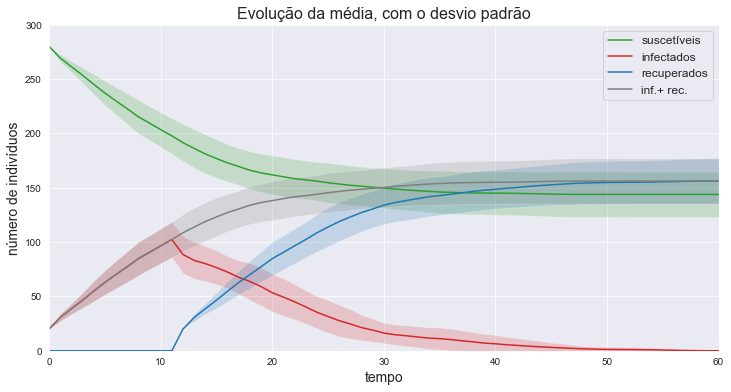

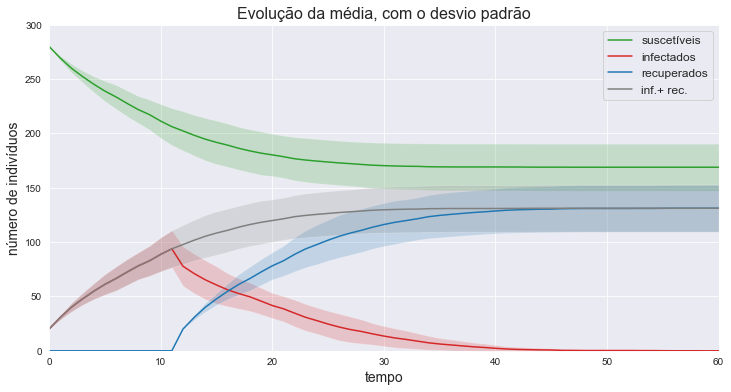

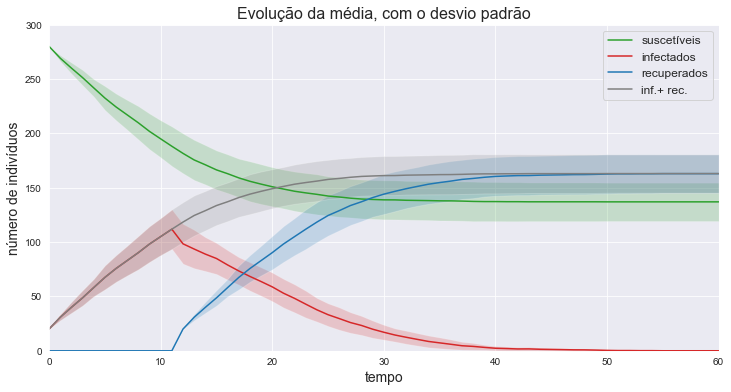

In [10]:
episiming.cenarios.abc = 0
redes_completas_salto = [episiming.cenarios.RedeCompleta(300, 20, 0.6, 1/2.6, kappa = kappa) for kappa in kappas]
Y_comps = [rede.evolui_matricial(dados_temporais, num_sim, show='sd') for rede in redes_completas_salto]

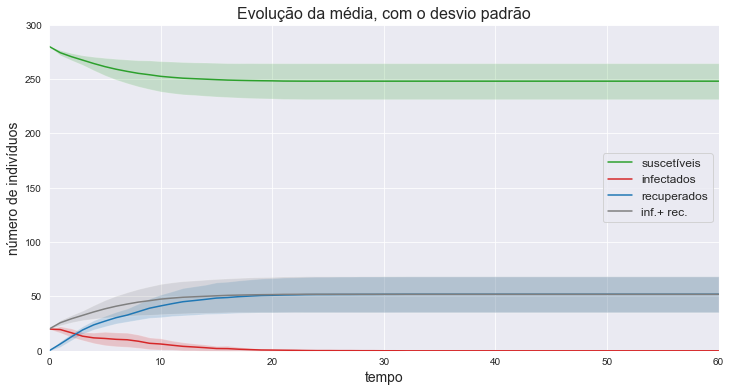

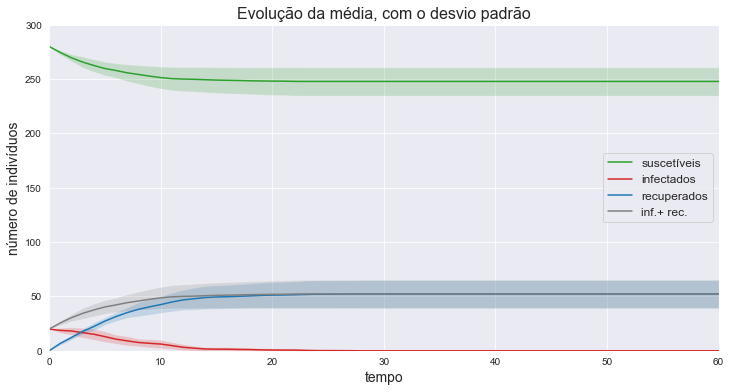

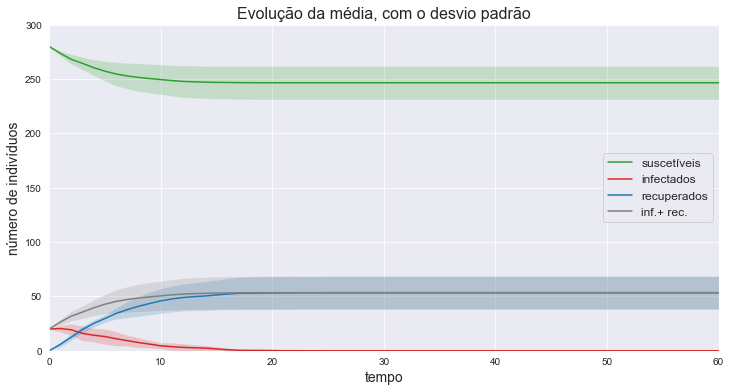

In [11]:
episiming.cenarios.abc = 4
episiming.individuais.bernoulli = True
redes_completas_bernoulli = [episiming.cenarios.RedeCompleta(300, 20, 0.6, 1/2.6, kappa = kappa) for kappa in kappas]
Z_comps = [rede.evolui_matricial(dados_temporais, num_sim, show='sd') for rede in redes_completas_bernoulli]

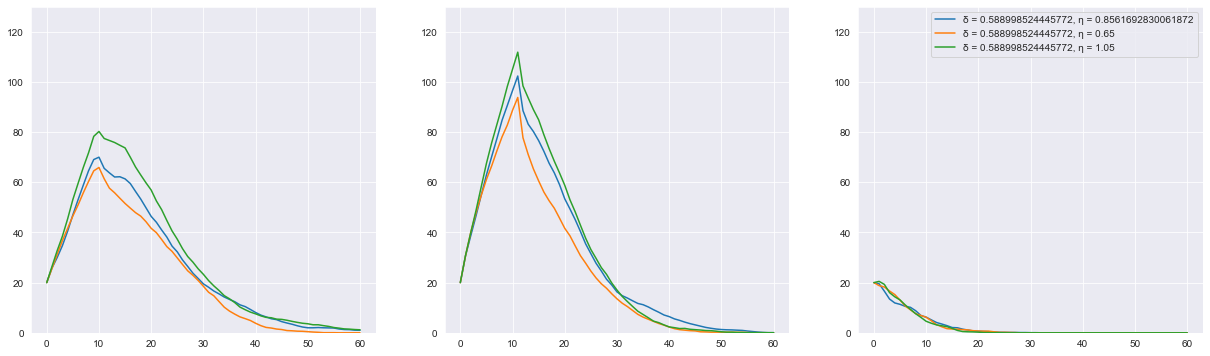

In [20]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(21,6))
for i, x in enumerate(X_comps):
    axs[0].plot(x.I_medio)
    axs[1].plot(Y_comps[i].I_medio)
    axs[2].plot(Z_comps[i].I_medio, label = f'δ = %s, η = %s' %(delta[i], eta[i]))
for ax in axs:
    ax.set_ylim(0, 130)
axs[2].legend()
plt.show()

δ = -0.7, η = 1.6


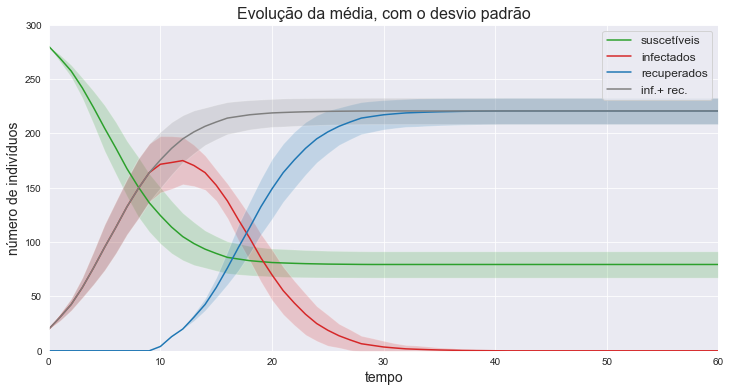

In [13]:
i = 0
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = -0.72, η = 1.8


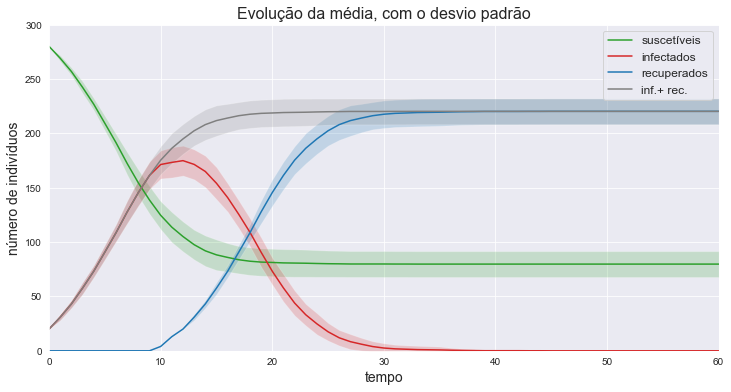

In [12]:
i = 1
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = -0.74, η = 2


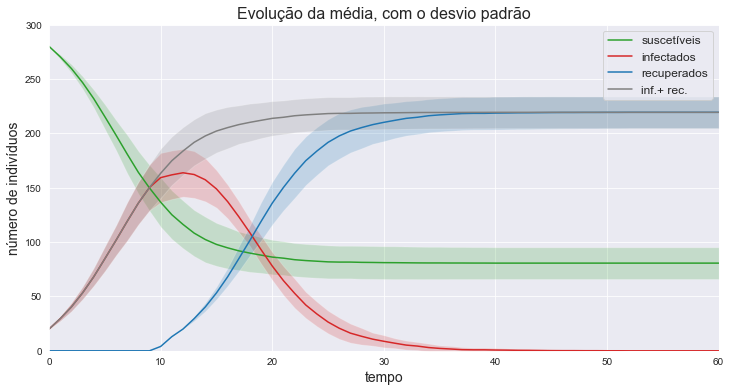

In [13]:
i = 2
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = -0.76, η = 2.2


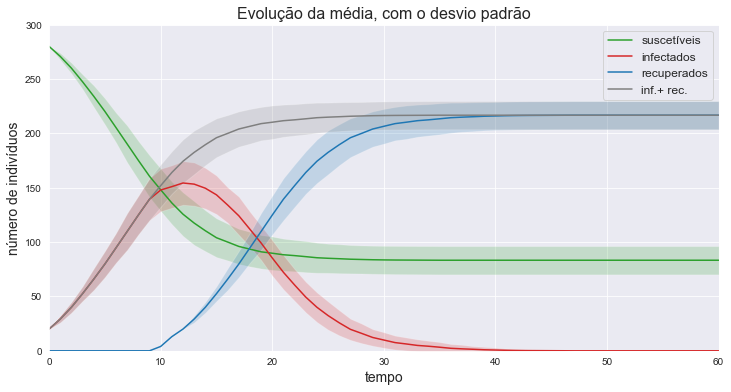

In [14]:
i = 3
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = 0.588998524445772, η = 0.8561692830061872


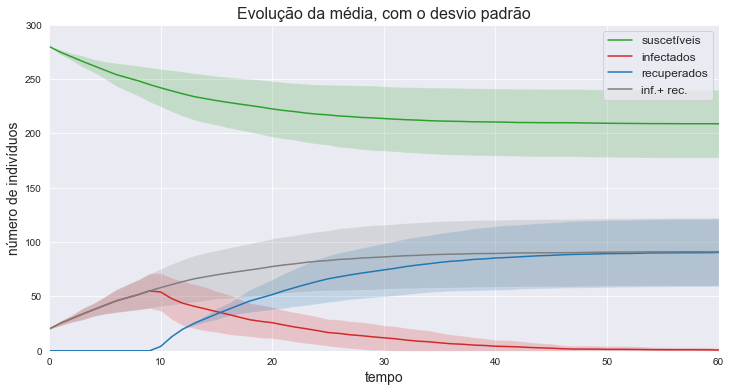

In [15]:
i = 4
print(f'δ = %s, η = %s' %(delta[i], eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

## Comparação no caso de taxas constantes
Para cada escolha de $\gamma$ e de $\beta$, vamos fazer simulações com kappa variável, sendo kappa a lognormal, $\delta = \ln\left(\frac{\ln(2)}{\gamma}\right)$ e $\eta = \sqrt{-2\ln(\ln(2))}$

In [74]:
gamma = 1/2.6
delta = np.log(np.log(2)/gamma)
delta

0.588998524445772

In [75]:
eta = np.sqrt(-2*np.log(np.log(2)))
eta

0.8561692830061872

In [76]:
beta = 0.6
gamma = 1/2.6
loc = 0.2
fator = 3.5
delta =  np.log(np.log(2)/gamma)
eta = [np.sqrt(-2*np.log(np.log(2))), 0.65, 1.05]
kappa0 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta), scale=eta[0], loc=loc)
kappa1 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta), scale=eta[1], loc=loc)
kappa2 = lambda t: fator*lognorm.pdf(t, s=np.exp(delta), scale=eta[2], loc=loc)
kappas = [ kappa0, kappa1, kappa2]

In [77]:
t_0 = 0
dt = 1
num_dt = 60
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 20

In [78]:
# beta = 0.6
# gamma = 1/2.6
redes_completas = [episiming.cenarios.RedeCompleta(300, 20, 0.6, 1/2.6, kappa = kappa) for kappa in kappas]

δ = 0.588998524445772, η = 0.8561692830061872


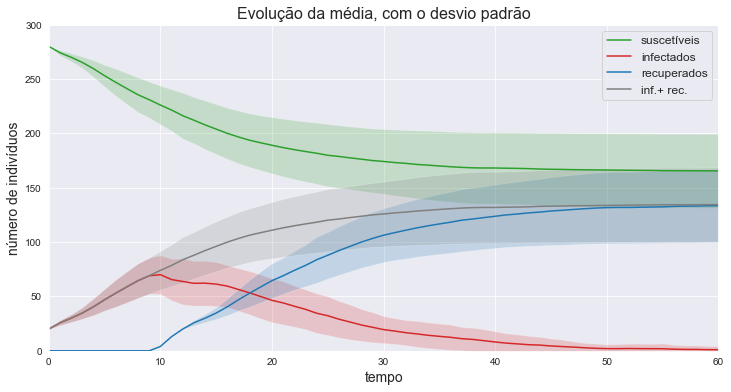

In [79]:
i = 0
print(f'δ = %s, η = %s' %(delta, eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = 0.588998524445772, η = 0.65


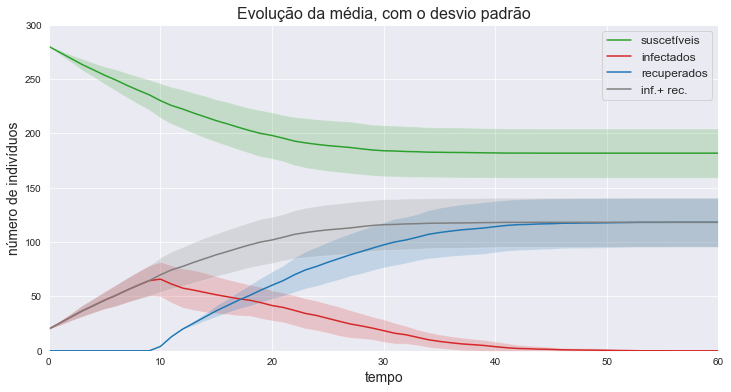

In [80]:
i = 1
print(f'δ = %s, η = %s' %(delta, eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

δ = 0.588998524445772, η = 1.05


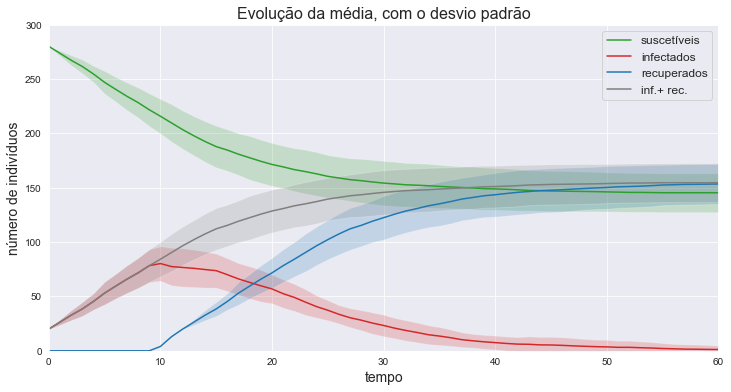

In [81]:
i = 2
print(f'δ = %s, η = %s' %(delta, eta[i]))
X_comp = redes_completas[i].evolui_matricial(dados_temporais, num_sim, show='sd')

### Com os mesmos $\gamma$ e $\beta$, vamos fazer a simulação com taxas constantes:
Consideramos a função kappa como uma taxa constante que só depende de $\gamma$

In [108]:
# estamos considerando gamma = 1/2.6
@np.vectorize
def kappa_cte(t):
    if t<=2.6:
        return 1
    else:
        return 0

In [110]:
rede_completa = episiming.cenarios.RedeCompleta(300, 20, 0.6, 1/2.6, kappa = kappa_cte)

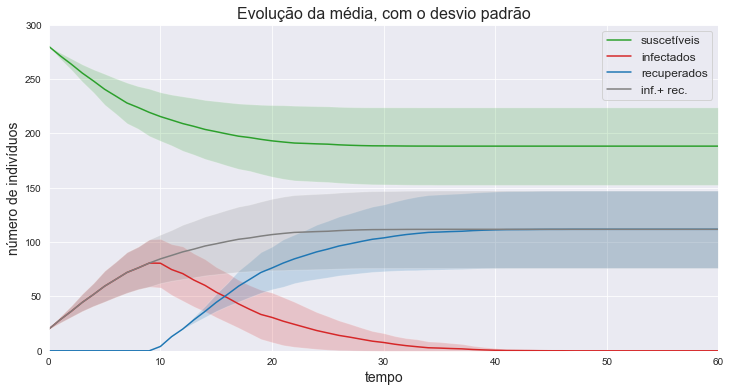

In [111]:
X_comp = rede_completa.evolui_matricial(dados_temporais, num_sim, show='sd')